In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('../Data/PJT002_train.csv')

train.sample()

,id,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn
11748,134621,2018-10-28 01:16:02,NaN,NaN,4,92.56,92.56,0.0,NaN,1.0,...,N,303,0,0,5154,18923,13781,145,0,N


In [4]:
pd.DataFrame(train.columns)

,0
0,id
1,dt_of_fr
2,bldng_us
3,bldng_archtctr
4,bldng_cnt
5,bldng_ar
6,ttl_ar
7,lnd_ar
8,dt_of_athrztn
9,ttl_grnd_flr


In [5]:
train.shape

(59199, 172)

In [6]:
train.isnull().sum()

id                          0
dt_of_fr                    0
bldng_us                27677
bldng_archtctr          27665
bldng_cnt                   0
bldng_ar                    0
ttl_ar                      0
lnd_ar                      0
dt_of_athrztn           27581
ttl_grnd_flr            10210
ttl_dwn_flr             11005
bldng_us_clssfctn       29343
tmprtr                     13
prcpttn                 53629
wnd_spd                    33
wnd_drctn                 221
hmdt                       22
gas_engry_us_201401     53825
ele_engry_us_201401     43550
gas_engry_us_201402     53825
ele_engry_us_201402     43550
gas_engry_us_201403     53825
ele_engry_us_201403     43550
gas_engry_us_201404     53825
ele_engry_us_201404     43550
gas_engry_us_201405     53825
ele_engry_us_201405     43550
gas_engry_us_201406     53825
ele_engry_us_201406     43550
gas_engry_us_201407     53825
                        ...  
lw_13101410             58916
lw_13111010             58899
lw_1311111

In [7]:
# 전기 가스 제외 나머지 칼럼
columns = ['id', 'dt_of_fr', 'bldng_us', 'bldng_archtctr', 'bldng_cnt'
           , 'bldng_ar', 'ttl_ar', 'lnd_ar', 'dt_of_athrztn', 'ttl_grnd_flr'
           , 'ttl_dwn_flr', 'bldng_us_clssfctn', 'tmprtr', 'prcpttn'
           , 'wnd_spd', 'wnd_drctn', 'hmdt', 'jmk'
           , 'fr_sttn_dstnc', 'fr_wthr_fclt_dstnc'
           , 'mlt_us_yn', 'cctv_dstnc', 'cctv_in_100m'
           , 'fr_wthr_fclt_in_100m', 'tbc_rtl_str_dstnc', 'sft_emrgnc_bll_dstnc'
           , 'ahsm_dstnc', 'no_tbc_zn_dstnc', 'bldng_cnt_in_50m', 'fr_yn'
          ]

train[columns].isnull().sum()

id                          0
dt_of_fr                    0
bldng_us                27677
bldng_archtctr          27665
bldng_cnt                   0
bldng_ar                    0
ttl_ar                      0
lnd_ar                      0
dt_of_athrztn           27581
ttl_grnd_flr            10210
ttl_dwn_flr             11005
bldng_us_clssfctn       29343
tmprtr                     13
prcpttn                 53629
wnd_spd                    33
wnd_drctn                 221
hmdt                       22
jmk                         0
fr_sttn_dstnc               0
fr_wthr_fclt_dstnc          0
mlt_us_yn                   0
cctv_dstnc                  0
cctv_in_100m                0
fr_wthr_fclt_in_100m        0
tbc_rtl_str_dstnc           0
sft_emrgnc_bll_dstnc        0
ahsm_dstnc                  0
no_tbc_zn_dstnc             0
bldng_cnt_in_50m            0
fr_yn                       0
dtype: int64

In [8]:
# NULL 값 없는 칼럼 전체

# 'emd_nm', 4개
# tmprtr 온도                     13
# wnd_spd 풍속                    33
# hmdt 습도                       22
# emd_nm 주소                     4
# hm_cnt 행정구역 인구            701
# fr_mn_cnt 관할 소방서 인원      41
# ttl_grnd_flr 건물 지상 층수 합 10210
# ttl_dwn_flr 건물 지하 층수 합  11005

columns = ['id', 'dt_of_fr', 'bldng_cnt', 'bldng_ar', 'ttl_ar', 'lnd_ar'
           , 'jmk', 'fr_sttn_dstnc', 'fr_wthr_fclt_dstnc'
           , 'mlt_us_yn', 'cctv_dstnc', 'cctv_in_100m'
           , 'fr_wthr_fclt_in_100m', 'tbc_rtl_str_dstnc', 'sft_emrgnc_bll_dstnc'
           , 'ahsm_dstnc', 'no_tbc_zn_dstnc', 'bldng_cnt_in_50m', 'fr_yn'
          ]

df = train[columns]

In [9]:
df.sample()

,id,dt_of_fr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,jmk,fr_sttn_dstnc,fr_wthr_fclt_dstnc,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn
56039,97046,2018-03-21 04:54:18,1,83.16,83.16,228.0,대,4948,1258,N,1153,0,0,1627,83640,2213,1508,0,N


## fr_yn One HOt Encoding
Y 1
N 0

In [10]:
df['fr_yn'].unique()

array(['N', 'Y'], dtype=object)

In [11]:
df['fire_yes'] = df['fr_yn'] == 'Y'

df[['fr_yn', 'fire_yes']].sample()

,fr_yn,fire_yes
17529,N,False


In [12]:
df[~df['fire_yes']]

,id,dt_of_fr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,jmk,fr_sttn_dstnc,fr_wthr_fclt_dstnc,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn,fire_yes
0,133759,2015-10-03 02:33:46,3,112.8600,112.8600,200.00,대,1727,609,N,129,0,0,809,2453,17664,83,0,N,False
1,96248,2016-11-13 17:05:57,3,721.8200,1109.5400,0.00,대,2659,79,N,27,5,1,1731,2561,18136,50,0,N,False
2,71317,2016-11-21 12:46:36,4,47.0600,47.0600,288.00,대,4093,259,N,273,0,0,825,3964,14944,270,1,N,False
3,86638,2016-11-07 02:50:14,2,171.4500,176.6400,1379.00,주,5931,103,N,109,0,0,1264,2572,15104,132,0,N,False
4,97748,2014-01-28 16:36:43,4,0.0000,0.0000,0.00,대,10433,8302,N,739,0,0,10241,100127,5000,5004,0,N,False
9,85144,2014-01-18 11:00:03,1,158.5700,254.5300,340.00,대,4894,174,N,222,0,0,58,3830,14479,103,6,N,False
11,131084,2016-05-19 10:49:16,1,128.5000,197.7100,259.00,대,2942,302,N,180,0,0,1955,2767,14997,287,0,N,False
12,105894,2015-02-09 03:36:02,3,70.6500,70.6500,274.00,대,3522,317,N,373,0,0,1692,3554,15757,274,0,N,False
13,122039,2015-02-21 05:00:38,2,59.1000,59.1000,327.00,대,5474,88,N,710,0,0,46,3678,17333,183,1,N,False
14,93985,2018-02-06 10:34:36,2,204.0000,204.0000,618.00,대,2438,443,N,257,0,0,999,1355,19979,368,0,N,False


# datetime Parsing 
dt_of_fr 화재 신고 일시?

In [13]:
df['year'] = pd.to_datetime(df['dt_of_fr']).dt.year
df['month'] = pd.to_datetime(df['dt_of_fr']).dt.month
df['day'] = pd.to_datetime(df['dt_of_fr']).dt.day
df['hour'] = pd.to_datetime(df['dt_of_fr']).dt.hour
df['minute'] = pd.to_datetime(df['dt_of_fr']).dt.minute
df['second'] = pd.to_datetime(df['dt_of_fr']).dt.second
df['dayofweek'] = pd.to_datetime(df['dt_of_fr']).dt.day_name()

df['year-month'] = df['dt_of_fr'].apply(lambda x: x[:7])

df[['dt_of_fr', 'year-month', 'year', 'month', 'day', 'dayofweek', 'hour', 'minute', 'second']].sample()

,dt_of_fr,year-month,year,month,day,dayofweek,hour,minute,second
55469,2018-02-03 04:31:29,2018-02,2018,2,3,Saturday,4,31,29


## df['fire_yes'] == True 불이 난 날

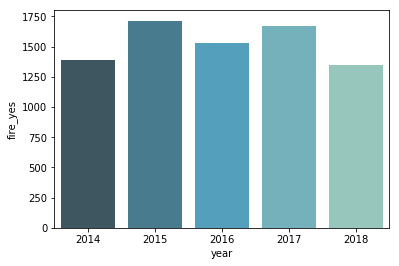

In [14]:
data = pd.DataFrame(df.groupby('year')['fire_yes'].sum()).reset_index()

sns.barplot(x='year', y='fire_yes', data=data, palette='GnBu_d')

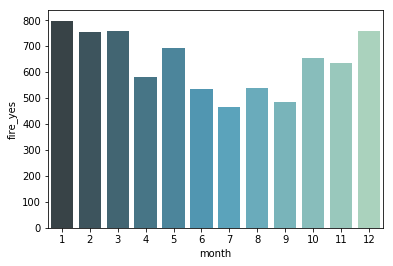

In [15]:
data = pd.DataFrame(df.groupby('month')['fire_yes'].sum()).reset_index()

sns.barplot(x='month', y='fire_yes', data=data, palette='GnBu_d')

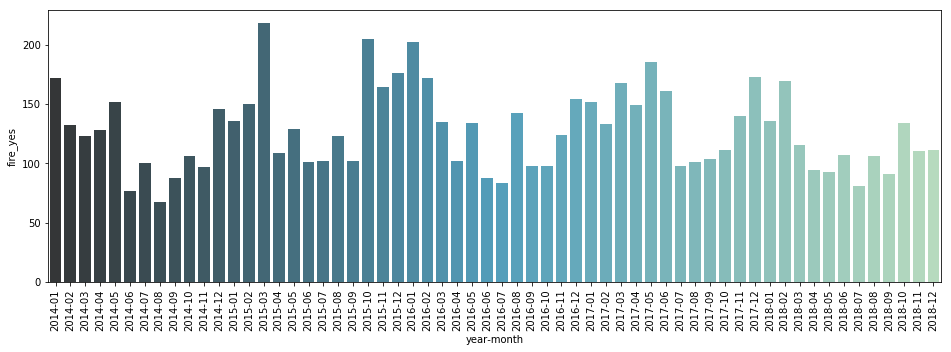

In [16]:
data = pd.DataFrame(df.groupby('year-month')['fire_yes'].sum()).reset_index()

plt.figure(figsize=[16, 5])
sns.barplot(x='year-month', y='fire_yes', data=data, palette='GnBu_d')
plt.xticks(rotation=90)
plt.show()

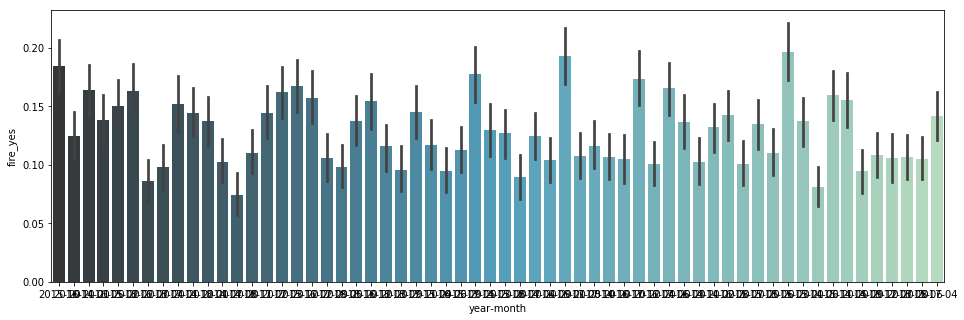

In [17]:
plt.figure(figsize=[16, 5])
sns.barplot(x='year-month', y='fire_yes', data=df, palette='GnBu_d')

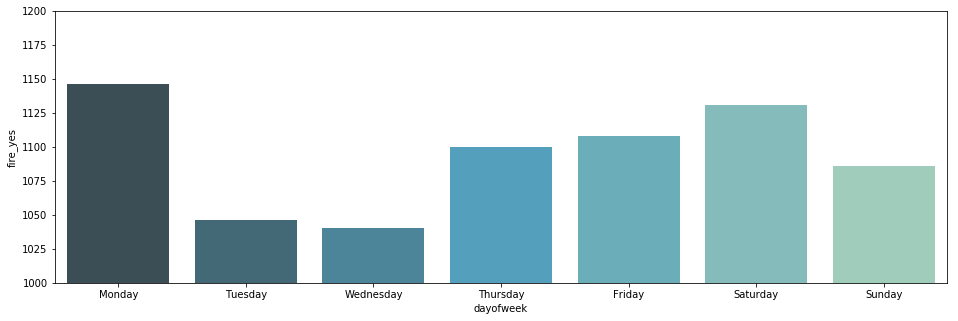

In [18]:
data = pd.DataFrame(df.groupby('dayofweek')['fire_yes'].sum()).reset_index()

index_weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=[16, 5])
axes=sns.barplot(x='dayofweek', y='fire_yes', data=data, order=index_weekday, palette='GnBu_d')
axes.set(ylim=(1000, 1200))
plt.show()

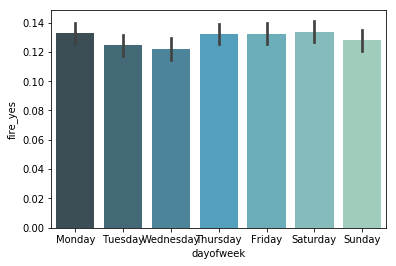

In [19]:
sns.barplot(x='dayofweek', y='fire_yes', data=df, order=index_weekday, palette='GnBu_d')

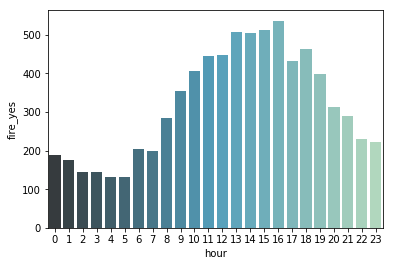

In [20]:
data = pd.DataFrame(df.groupby('hour')['fire_yes'].sum()).reset_index()

sns.barplot(x='hour', y='fire_yes', data=data, palette='GnBu_d')
plt.show()

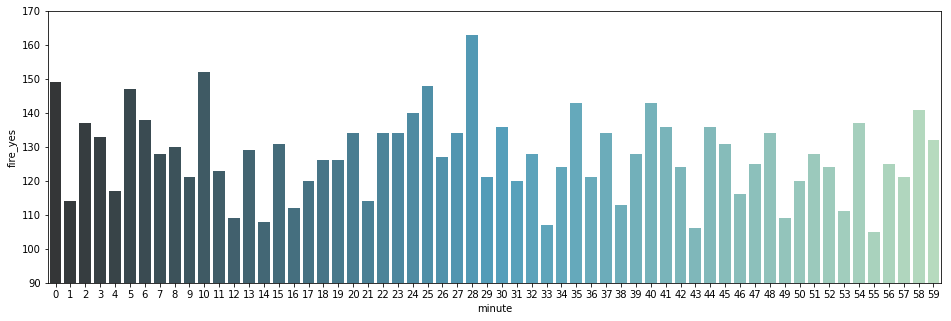

In [21]:
data = pd.DataFrame(df.groupby('minute')['fire_yes'].sum()).reset_index()

plt.figure(figsize=[16, 5])
axes = sns.barplot(x='minute', y='fire_yes', data=data, palette='GnBu_d')
axes.set(ylim=(90, 170))
plt.show()

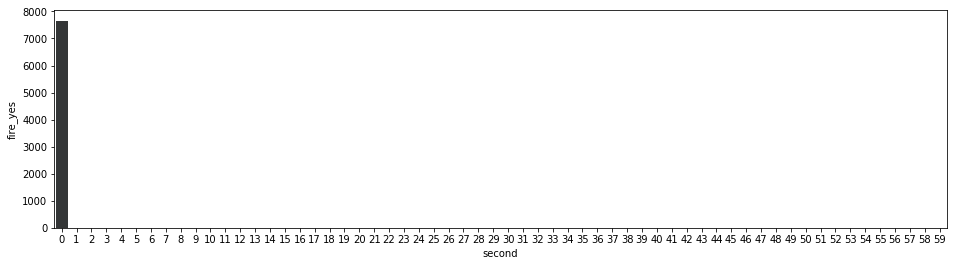

In [22]:
data = pd.DataFrame(df.groupby('second')['fire_yes'].sum()).reset_index()

plt.figure(figsize=[16, 4])
sns.barplot(x='second', y='fire_yes', data=data, palette='GnBu_d')
plt.show()

## df['fire_yes'] == False 불이 안난 날

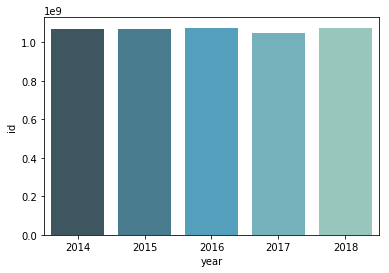

In [23]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('year')['id'].sum()).reset_index()

sns.barplot(x='year', y='id', data=data, palette='GnBu_d')

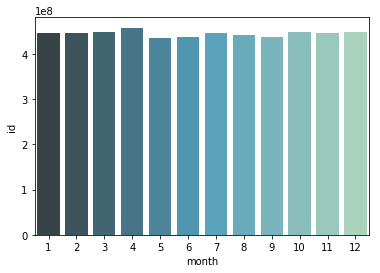

In [24]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('month')['id'].sum()).reset_index()

sns.barplot(x='month', y='id', data=data, palette='GnBu_d')

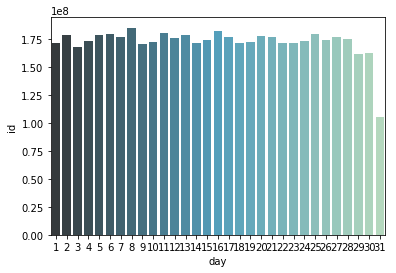

In [25]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('day')['id'].sum()).reset_index()

sns.barplot(x='day', y='id', data=data, palette='GnBu_d')

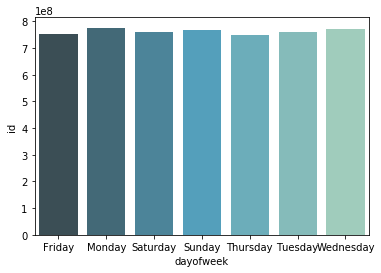

In [26]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('dayofweek')['id'].sum()).reset_index()

sns.barplot(x='dayofweek', y='id', data=data, palette='GnBu_d')

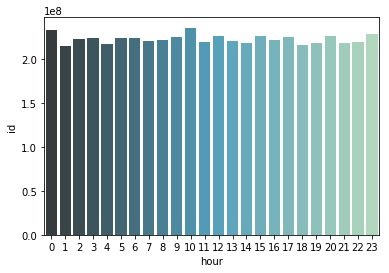

In [27]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('hour')['id'].sum()).reset_index()

sns.barplot(x='hour', y='id', data=data, palette='GnBu_d')

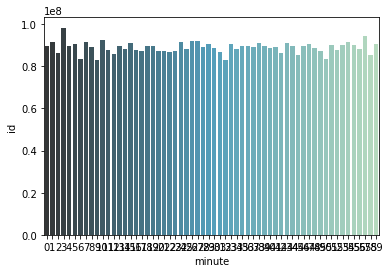

In [28]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('minute')['id'].sum()).reset_index()

sns.barplot(x='minute', y='id', data=data, palette='GnBu_d')

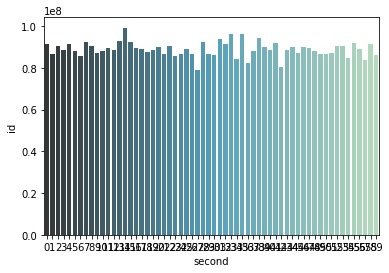

In [29]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('second')['id'].sum()).reset_index()

sns.barplot(x='second', y='id', data=data, palette='GnBu_d')

# correlation

In [30]:
df.corr()
# second -0.5 :화재발생은 0초에만 있어서
# fr_wthr_fclt_dstnc -0.16: 소방용수시설과 가까울수록 화재발생
# - 불이 자주 나는 곳에 소방용수시설을 설치했기 때문 
# ahsm_dstnc 0.11: 자동심장제세동기와의 거리
# - 시설이 있는 곳이 도시
# fr_wthr_fclt_in_100m 0.09
# bldng_ar 0.08

# hour 0.07
# fr_sttn_dstnc -0.07
# tbc_rtl_str_dstnc -0.06
# bldng_cnt 0.05
# ttl_ar 0.05

,id,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,fr_sttn_dstnc,fr_wthr_fclt_dstnc,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,...,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fire_yes,year,month,day,hour,minute,second
id,1.000000,-0.001038,0.005470,-0.000870,0.000515,-0.000474,0.008163,-0.001483,0.001142,-0.007934,...,0.001546,0.004541,0.001812,-0.002368,-0.002544,-0.001609,-0.000267,-0.000414,-0.012124,-0.000104
bldng_cnt,-0.001038,1.000000,0.530414,0.189012,0.443320,0.009314,-0.014234,0.010925,-0.066528,-0.051694,...,-0.003087,0.029456,-0.048917,0.056176,0.002270,0.000446,-0.004154,0.008258,-0.000111,-0.025870
bldng_ar,0.005470,0.530414,1.000000,0.329309,0.604804,-0.029663,-0.005821,-0.011676,-0.014838,-0.008633,...,0.034578,-0.014944,-0.009598,0.085169,0.001947,0.003814,-0.000062,0.011439,-0.003473,-0.042919
ttl_ar,-0.000870,0.189012,0.329309,1.000000,0.230771,-0.020504,-0.011536,-0.011232,-0.006543,0.004590,...,0.026339,-0.015214,-0.003122,0.059955,0.003046,0.002909,-0.000263,0.001096,-0.001693,-0.031276
lnd_ar,0.000515,0.443320,0.604804,0.230771,1.000000,-0.004147,-0.005827,-0.000384,-0.003896,-0.002267,...,-0.003103,-0.004577,0.000704,0.025034,0.006845,-0.001965,0.001709,0.005195,0.001424,-0.012330
fr_sttn_dstnc,-0.000474,0.009314,-0.029663,-0.020504,-0.004147,1.000000,0.070991,0.363127,-0.237448,-0.220333,...,0.057742,0.178793,-0.284051,-0.070687,0.003074,-0.001068,-0.000498,-0.007309,0.000167,0.037959
fr_wthr_fclt_dstnc,0.008163,-0.014234,-0.005821,-0.011536,-0.005827,0.070991,1.000000,0.098490,0.076436,-0.285666,...,-0.272471,0.001452,0.033513,-0.165280,0.001422,-0.003456,0.004841,-0.009888,-0.003842,0.084503
cctv_dstnc,-0.001483,0.010925,-0.011676,-0.011232,-0.000384,0.363127,0.098490,1.000000,-0.188067,-0.155715,...,-0.114840,0.101578,-0.148197,-0.029258,-0.003059,-0.004526,0.005605,-0.003888,0.001391,0.011745
cctv_in_100m,0.001142,-0.066528,-0.014838,-0.006543,-0.003896,-0.237448,0.076436,-0.188067,1.000000,0.246822,...,0.001951,-0.166905,0.212812,0.027540,0.007794,0.005606,-0.004610,-0.001072,-0.009495,-0.014431
fr_wthr_fclt_in_100m,-0.007934,-0.051694,-0.008633,0.004590,-0.002267,-0.220333,-0.285666,-0.155715,0.246822,1.000000,...,0.072657,-0.108722,0.239189,0.096476,-0.002232,0.003773,-0.003304,0.010691,-0.004237,-0.043929


## fr_wthr_fclt_dstnc 소방용수시설과의 최소 거리

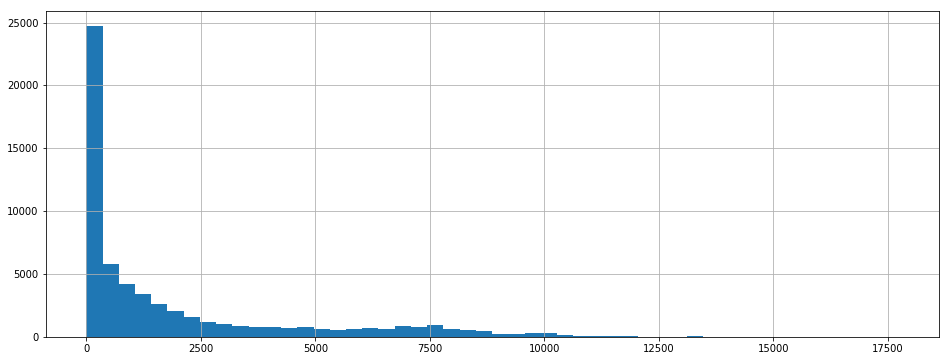

In [31]:
df['fr_wthr_fclt_dstnc'].hist(figsize=[16, 6], bins=50)

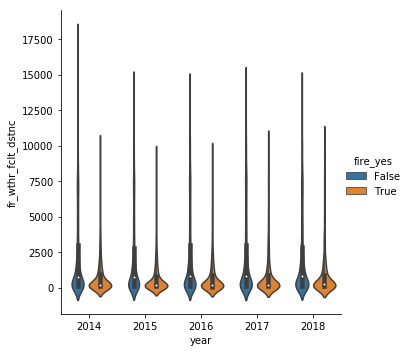

In [32]:
sns.catplot(hue='fire_yes', y='fr_wthr_fclt_dstnc', x='year', data=df, kind='violin')
plt.show()

## ahsm_dstnc 자동심장충격기와의 거리 
상관없을것 같은데, 외진 곳일수록 자동심장충격기도 적어서 결국 외진 곳에서 화재발생 많이 난다는 뜻?

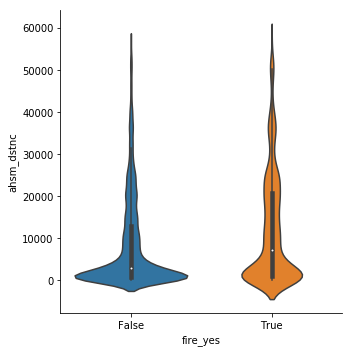

In [33]:
sns.catplot(
    x='fire_yes'
            , y='ahsm_dstnc'
            , data=df
            , kind='violin')
plt.show()

## fr_wthr_fclt_in_100m 반경 100m 내 소방용수시설 수
- 100m 내 소방용수시설이 많을수록 화재발생
- 불이 많이 나는 곳일수록 소방용수시설 많이 설치?
- 대부분 없다

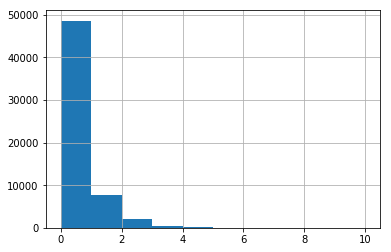

In [34]:
#100m 내 소방용수시설수 전체

df['fr_wthr_fclt_in_100m'].hist()

                         id
fr_wthr_fclt_in_100m       
0                     48609
1                      7668
2                      2168
3                       533
4                       167
5                        36
6                        11
7                         5
8                         1
10                        1


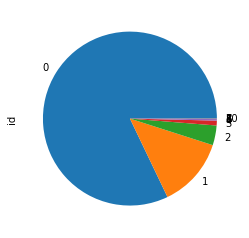

In [35]:
data =df.groupby('fr_wthr_fclt_in_100m')['id'].size()
print(pd.DataFrame(data))
data.plot.pie()

In [36]:
# 100m 내 소방용수시설수 화재발생건 only

data = pd.DataFrame(df.groupby('fr_wthr_fclt_in_100m')['fire_yes'].sum())
data
# data['fire_yes'].hist(bins=50)

,fire_yes
fr_wthr_fclt_in_100m,
0,5540.0
1,1448.0
2,485.0
3,124.0
4,45.0
5,11.0
6,2.0
7,2.0
8,0.0


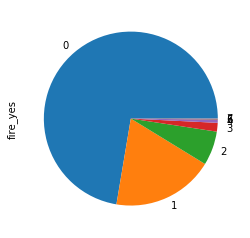

In [37]:
data = df.groupby('fr_wthr_fclt_in_100m')['fire_yes'].sum()

data.plot.pie()

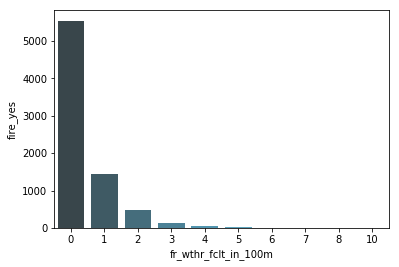

In [38]:
data = pd.DataFrame(df.groupby('fr_wthr_fclt_in_100m')['fire_yes'].sum()).reset_index()

sns.barplot(x='fr_wthr_fclt_in_100m', y='fire_yes', data=data, palette='GnBu_d')

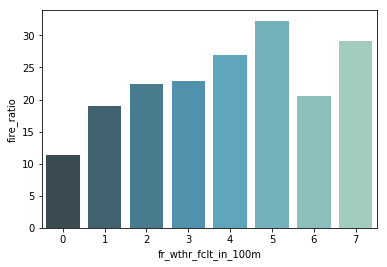

In [39]:
# 소방용수 시설 거리에 따른 화재발생 비율

data_True = pd.DataFrame(df[df['fire_yes'] == True].groupby(['fr_wthr_fclt_in_100m', 'fire_yes'])['id'].sum()).reset_index()
data_False = pd.DataFrame(df[df['fire_yes'] == False].groupby(['fr_wthr_fclt_in_100m', 'fire_yes'])['id'].sum()).reset_index()

data = data_True.merge(data_False, how='inner', on='fr_wthr_fclt_in_100m')
data['fire_ratio'] = data['id_x'].apply(lambda x: int(x)) * 100 / (data['id_x'].apply(lambda x: int(x)) + data['id_y'].apply(lambda x: int(x)))

# data
sns.barplot(x='fr_wthr_fclt_in_100m', y='fire_ratio', data=data, palette='GnBu_d')

## bldng_ar 건물 건축면적

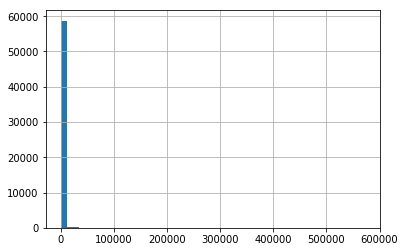

In [40]:
df['bldng_ar'].hist(bins=50)

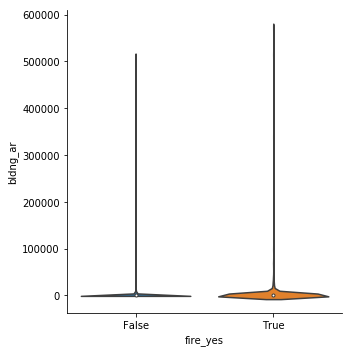

In [41]:
sns.catplot(
    x='fire_yes'
            , y='bldng_ar'
#             , x='year'
            , data=df
            , kind='violin')
plt.show()

## jmk 용도

In [42]:
df['jmk'].unique()

array(['대', '주', '잡', '종', '차', '답', '장', '양', '전', '창', '학', '목', '도',
       '임', '철', '유', '천', '구', '체', '과', '묘', '공', '원', '사', '제', '수'],
      dtype=object)

In [43]:
plt.rcParams['font.family'] = 'NanumGothic'

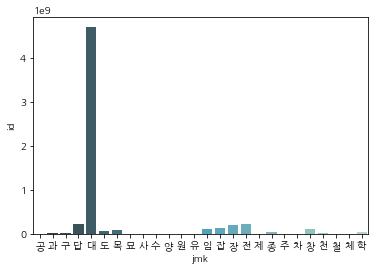

In [44]:
data = pd.DataFrame(df.groupby('jmk')['id'].sum()).reset_index()

sns.barplot(x='jmk', y='id', data=data, palette='GnBu_d')

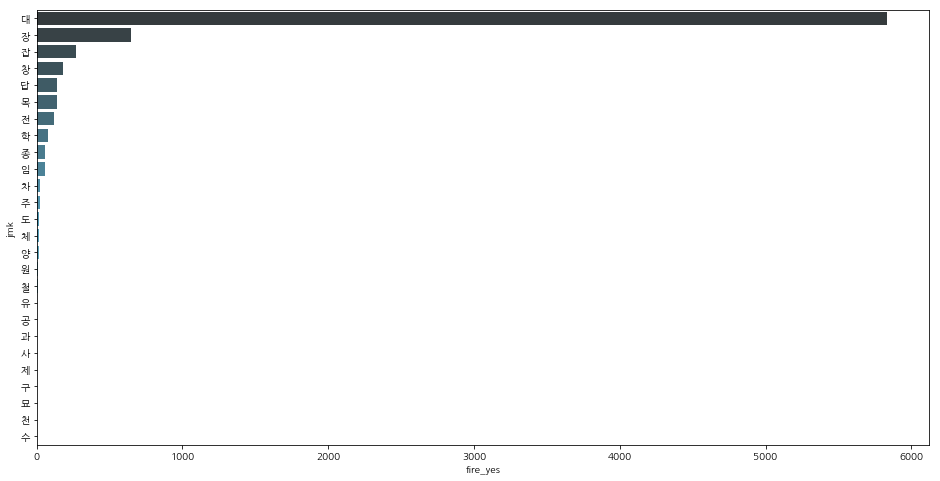

In [45]:
data = pd.DataFrame(df.groupby('jmk')['fire_yes'].sum()).reset_index()
data = data.sort_values(['fire_yes'], ascending=False)

plt.figure(figsize=[16, 8])
sns.barplot(y='jmk', x='fire_yes', data=data, palette='GnBu_d')

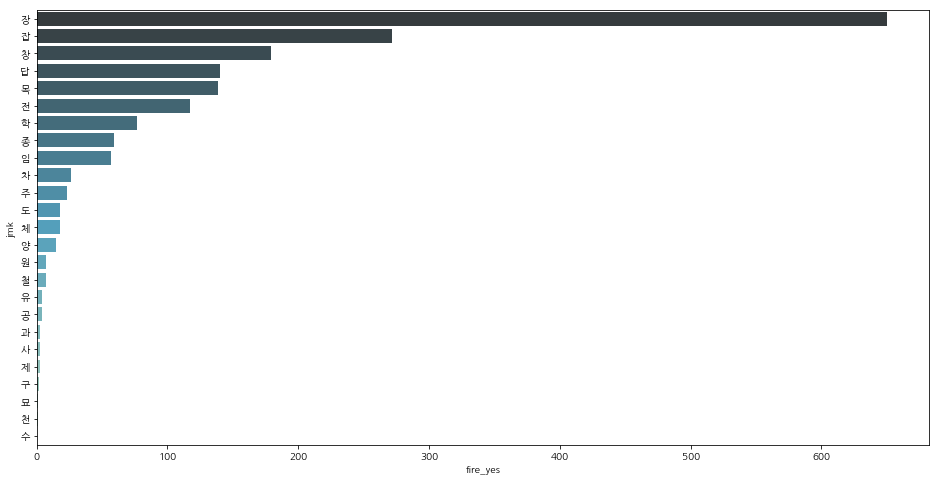

In [46]:
data = pd.DataFrame(df[df['jmk'] != '대'].groupby('jmk')['fire_yes'].sum()).reset_index()

data = data.sort_values(['fire_yes'], ascending=False)
plt.figure(figsize=[16, 8])
sns.barplot(y='jmk', x='fire_yes', data=data, palette='GnBu_d')

### jmk log scale 적용

In [47]:
data['fire_yes(log)'] = np.log(data['fire_yes'])
# 화재발생 0 인 곳이 있어서, log 값을 그래프에 나타내기 위해 0.1로 고쳐줌
data.loc[data['fire_yes'] == 0, 'fire_yes(log)'] = 0.1
data[['fire_yes', 'fire_yes(log)']].sample()

,fire_yes,fire_yes(log)
6,1.0,0.0


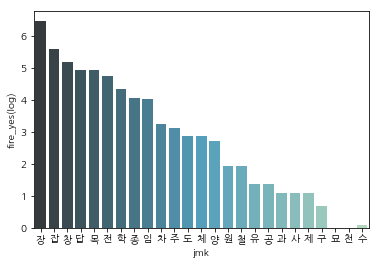

In [48]:
sns.barplot(x='jmk', y='fire_yes(log)', data=data, palette='GnBu_d')

### 각 지목jmk별 화재발생 비율 계산 

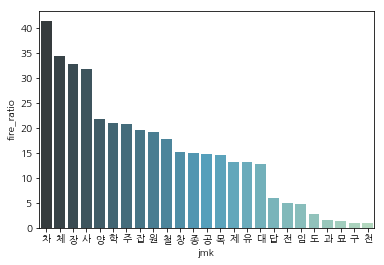

In [49]:
data_True = pd.DataFrame(df[df['fire_yes'] == True].groupby(['jmk', 'fire_yes'])['id'].sum()).reset_index()
data_False = pd.DataFrame(df[df['fire_yes'] == False].groupby(['jmk', 'fire_yes'])['id'].sum()).reset_index()

data = data_True.merge(data_False, how='left', on='jmk')
data['fire_ratio'] = data['id_x'].apply(lambda x: int(x)) * 100 / (data['id_x'].apply(lambda x: int(x)) + data['id_y'].apply(lambda x: int(x)))

data = data.sort_values('fire_ratio', ascending=False)
data[['jmk', 'fire_ratio']]

sns.barplot(x='jmk', y='fire_ratio', data=data, palette='GnBu_d')

## fr_sttn_dstnc

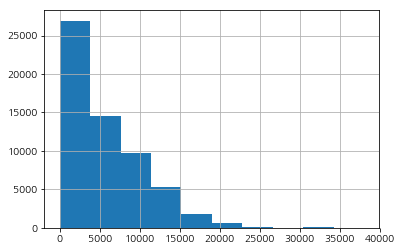

In [50]:
df['fr_sttn_dstnc'].hist()

In [ ]:
# data = pd.DataFrame(df.groupby('fr_sttn_dstnc')['fire_yes'].sum()).reset_index()

# sns.barplot(x='fr_sttn_dstnc', y='fire_yes', data=data, palette='GnBu_d')

In [52]:
# fr_sttn_dstnc 비율
data_True = pd.DataFrame(df[df['fire_yes'] == True].groupby(['fr_sttn_dstnc', 'fire_yes'])['id'].size()).reset_index()
data_False = pd.DataFrame(df[df['fire_yes'] == False].groupby(['fr_sttn_dstnc', 'fire_yes'])['id'].size()).reset_index()

data = data_True.merge(data_False, how='inner', on='fr_sttn_dstnc')
data['fire_ratio'] = data['id_x'].apply(lambda x: int(x)) * 100 / (data['id_x'].apply(lambda x: int(x)) + data['id_y'].apply(lambda x: int(x)))

data

,fr_sttn_dstnc,fire_yes_x,id_x,fire_yes_y,id_y,fire_ratio
0,42,True,1,False,1,50.000000
1,50,True,1,False,2,33.333333
2,57,True,1,False,1,50.000000
3,58,True,1,False,2,33.333333
4,61,True,2,False,1,66.666667
5,75,True,1,False,1,50.000000
6,77,True,2,False,2,50.000000
7,79,True,1,False,4,20.000000
8,80,True,1,False,3,25.000000
9,83,True,1,False,4,20.000000


In [ ]:
# # relplot 은 이렇게 쓰는거 아닌듯
# sns.relplot(x='fr_sttn_dstnc', y='fire_ratio', data=data)
# plt.show()

### fr_sttn_dstnc 119안전센터와의 거리 log scale

In [53]:
df['fr_sttn_dstnc(log)'] = np.log(df['fr_sttn_dstnc'])

df[['fr_sttn_dstnc', 'fr_sttn_dstnc(log)']].sample()

,fr_sttn_dstnc,fr_sttn_dstnc(log)
50158,12391,9.424726


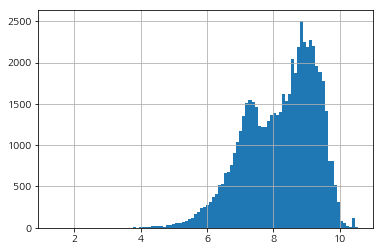

In [54]:
df['fr_sttn_dstnc(log)'].hist(bins=100)

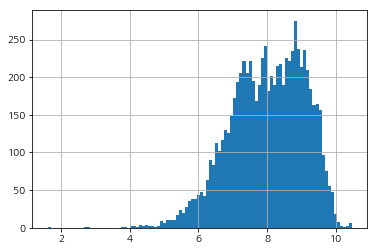

In [55]:
df[df['fire_yes'] == True]['fr_sttn_dstnc(log)'].hist(bins=100)

## tbc_rtl_str_dstnc 담배소매점과의 거리

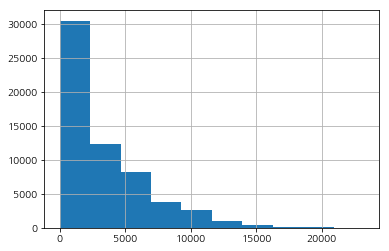

In [56]:
df['tbc_rtl_str_dstnc'].hist()

In [58]:
# 비율 계산

# data_True = pd.DataFrame(df[df['fire_yes'] == True].groupby(['tbc_rtl_str_dstnc', 'fire_yes'])['id'].sum()).reset_index()
# data_False = pd.DataFrame(df[df['fire_yes'] == False].groupby(['tbc_rtl_str_dstnc', 'fire_yes'])['id'].sum()).reset_index()

# data = data_True.merge(data_False, how='inner', on='tbc_rtl_str_dstnc')
# data['fire_ratio'] = data['id_x'].apply(lambda x: int(x)) * 100 / (data['id_x'].apply(lambda x: int(x)) + data['id_y'].apply(lambda x: int(x)))

# # data
# sns.barplot(x='tbc_rtl_str_dstnc', y='fire_ratio', data=data, palette='GnBu_d')

### tbc_rtl_str_dstnc 담배소매점과의 거리 log scale

In [59]:
df['tbc_rtl_str_dstnc(log)'] = np.log(df['tbc_rtl_str_dstnc'])
# 담배 소매점과의 거리가 0 인 곳이 80여곳 있어서, log 값을 그래프에 나타내기 위해 0.1로 고쳐줌
df.loc[df['tbc_rtl_str_dstnc'] == 0, 'tbc_rtl_str_dstnc(log)'] = 0.1
df[['tbc_rtl_str_dstnc', 'tbc_rtl_str_dstnc(log)']].sample()

,tbc_rtl_str_dstnc,tbc_rtl_str_dstnc(log)
7307,697,6.546785


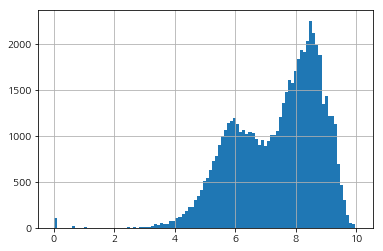

In [60]:
df['tbc_rtl_str_dstnc(log)'].hist(bins=100)

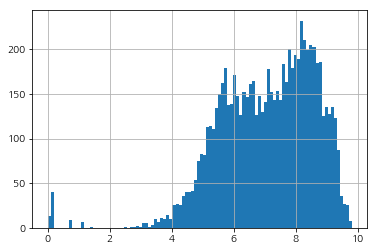

In [61]:
df[df['fire_yes'] == True]['tbc_rtl_str_dstnc(log)'].hist(bins=100)

## bldng_cnt 건물 채수

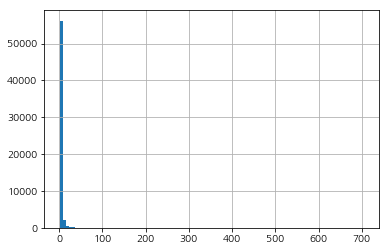

In [62]:
df['bldng_cnt'].hist(bins=100)

In [63]:
df['bldng_cnt(log)'] = np.log(df['bldng_cnt'])

df[['bldng_cnt', 'bldng_cnt(log)']].sample()

,bldng_cnt,bldng_cnt(log)
9564,1,0.0


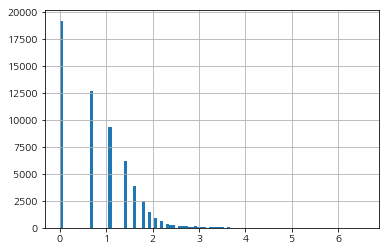

In [64]:
df['bldng_cnt(log)'].hist(bins=100)

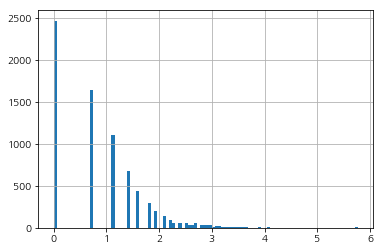

In [65]:
df[df['fire_yes'] == True]['bldng_cnt(log)'].hist(bins=100)

## ttl_ar 건물연면적

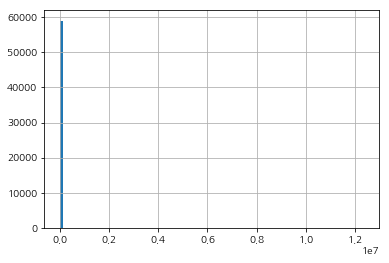

In [66]:
df['ttl_ar'].hist(bins=100)

In [67]:
df['ttl_ar(log)'] = np.log(df['ttl_ar'])
df.loc[df['ttl_ar'] == 0, 'ttl_ar(log)'] = 1 
df[['ttl_ar', 'ttl_ar(log)']].sample()

,ttl_ar,ttl_ar(log)
19776,184.0,5.214936


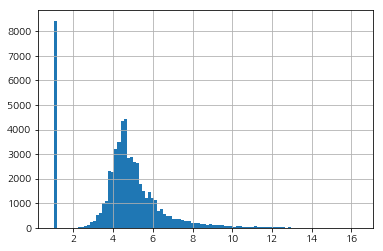

In [68]:
df['ttl_ar(log)'].hist(bins=100)

# Null 값 있는 컬럼

## emd_nm 주소                     4

In [69]:
train[(train['emd_nm'].isnull()) | (train['emd_nm'] == 'nan')]['emd_nm']

9165     NaN
15380    NaN
32671    NaN
36516    NaN
Name: emd_nm, dtype: object

In [70]:
address = train.drop([9165, 15380, 32671, 36516], axis=0)
# df = df.drop([9165, 15380, 32671, 36516], axis=0)

address.sample()

,id,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn
565,113475,2017-07-07 02:11:10,단독주택,벽돌구조,2,124.56,122.46,513.0,2.00306e+07,1.0,...,N,889,0,0,3231,29191,24435,1247,0,N


In [71]:
address['시도'] = np.nan
address['시군구'] = np.nan
address['구시동면읍'] = np.nan

address['시도'] = address['emd_nm'].apply(lambda x: str(x).split()[0])
address['시군구'] = address['emd_nm'].apply(lambda x: str(x).split()[1][:3])
address['구시동면읍'] = address['emd_nm'].apply(lambda x: str(x).split()[2])
# 창원시는 따로
address.loc[address['시군구'].apply(lambda x: len(x) > 3), '구시동면읍'] = address['emd_nm'].apply(lambda x: str(x).split()[1][3:])

address[['emd_nm', '시도', '시군구', '구시동면읍']].sample()

,emd_nm,시도,시군구,구시동면읍
55134,경상남도 고성군 거류면,경상남도,고성군,거류면


In [72]:
df['시도'] = address['시도']
df['시군구'] = address['시군구']
df['구시동면읍'] = address['구시동면읍']
df['주소'] = address['시도'] + ' ' + address['시군구'] + ' ' + address['구시동면읍']

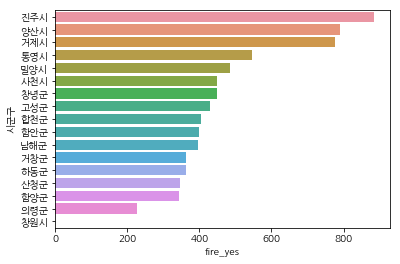

In [73]:
data = pd.DataFrame(df.groupby('시군구')['fire_yes'].sum().reset_index())
data = data.sort_values('fire_yes', ascending=False)

sns.barplot(y='시군구', x='fire_yes',data=data)

## 행정구역 emd_nm 전체

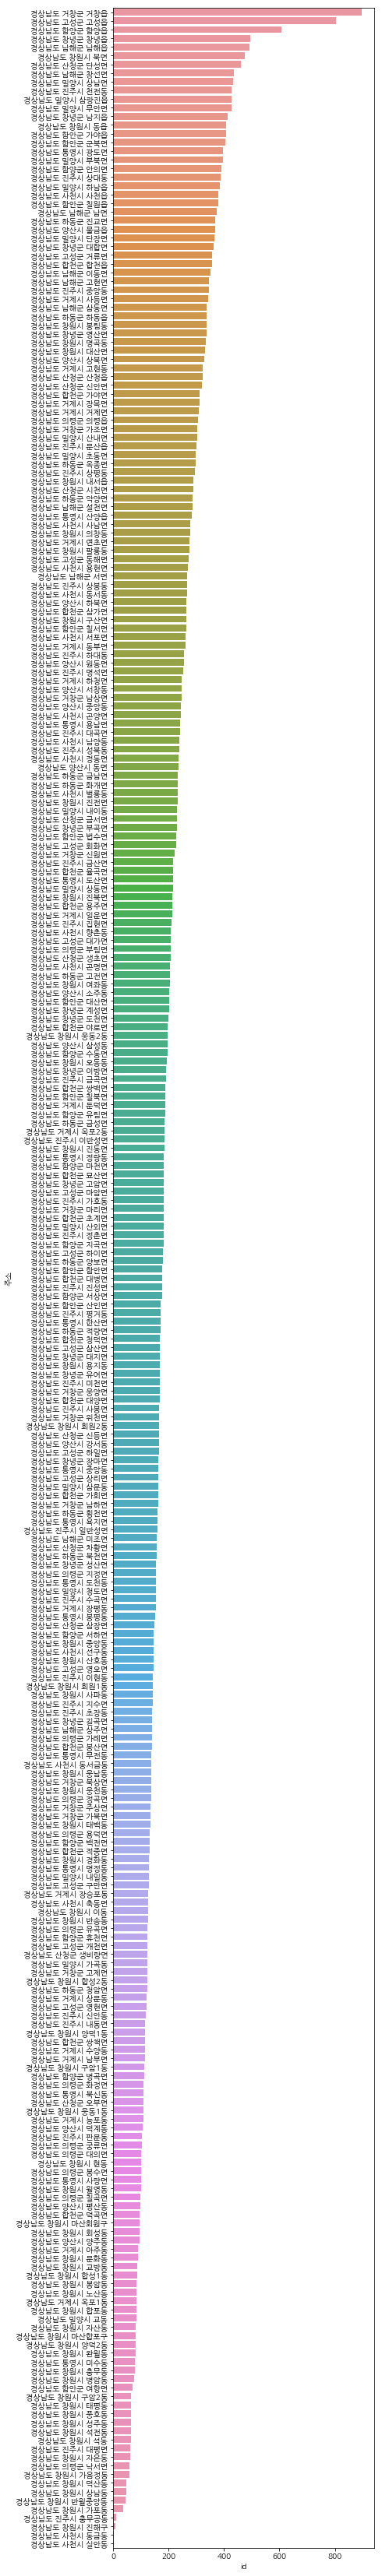

In [112]:
countby_address = pd.DataFrame(df.groupby('주소')['id'].count().reset_index())
countby_address = countby_address.sort_values('id', ascending=False)

plt.figure(figsize=[6, 60])
sns.barplot(y='주소', x='id',data=countby_address)

## 행정구역별 화재발생 수

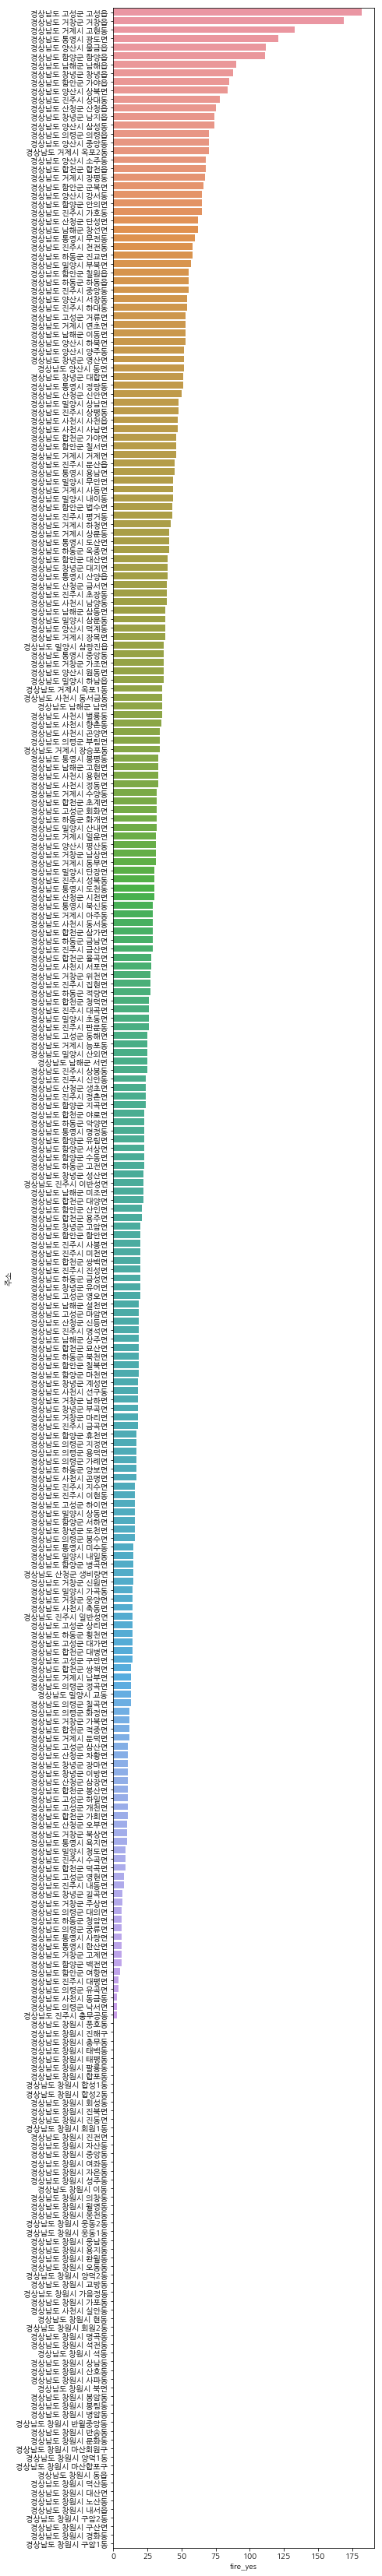

In [114]:
fire_countby_address = pd.DataFrame(df.groupby('주소')['fire_yes'].sum().reset_index())
fire_countby_address = fire_countby_emd_nm.sort_values('fire_yes', ascending=False)

plt.figure(figsize=[6, 60])
sns.barplot(y='주소', x='fire_yes',data=fire_countby_address)

## 행정구역별 화재발생 비율

In [118]:
fire_address = fire_countby_address.merge(countby_address, how='left', on='주소')

fire_address.sample()

,주소,fire_yes,id
78,경상남도 거제시 옥포1동,36.0,84


In [123]:
fire_address['ratio'] = fire_address['fire_yes'] * 100 / fire_address['id']
fire_address = fire_address.sort_values('ratio', ascending=False)
fire_address.sample()

,주소,fire_yes,id,ratio
80,경상남도 남해군 남면,36.0,374,9.625668


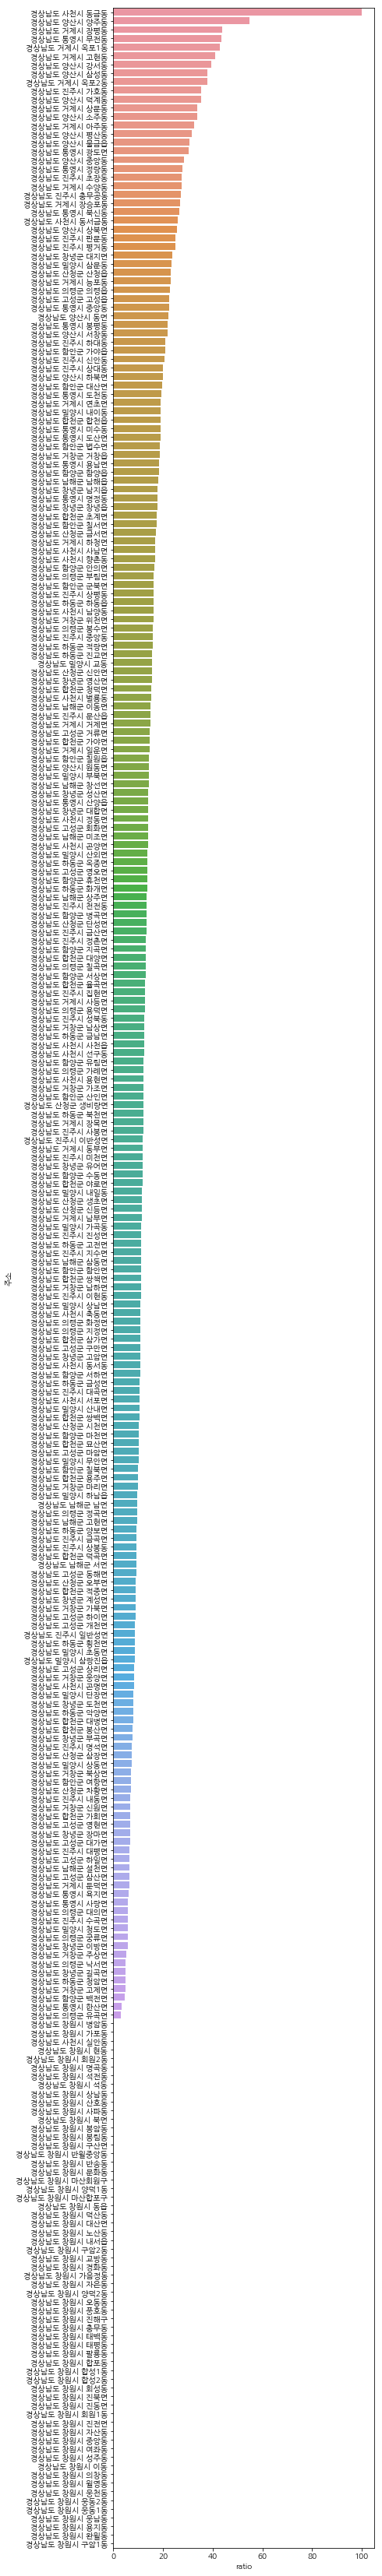

In [124]:
plt.figure(figsize=[6, 60])

sns.barplot(y='주소', x='ratio',data=fire_address)

화재발생비율이 100 % 인 사천시 동금동 데이터만 따로 보았다
- 전체 데이터 3 건 중 화재발생 3 건...

In [125]:
df[df['주소'] == '경상남도 사천시 동금동']

,id,dt_of_fr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,jmk,fr_sttn_dstnc,fr_wthr_fclt_dstnc,mlt_us_yn,...,year-month,fr_sttn_dstnc(log),tbc_rtl_str_dstnc(log),bldng_cnt(log),ttl_ar(log),시도,시군구,구시동면읍,주소,fire_countby_emd_nm
20446,113578,2017-06-26 20:12:00,1,225.21,203.73,675.0,잡,934,245,N,...,2017-06,6.839476,5.880533,0.0,5.316796,경상남도,사천시,동금동,경상남도 사천시 동금동,3.0
20673,118226,2014-08-08 14:26:00,1,225.21,203.73,675.0,잡,934,245,N,...,2014-08,6.839476,5.880533,0.0,5.316796,경상남도,사천시,동금동,경상남도 사천시 동금동,3.0
20680,104635,2014-05-22 21:38:00,1,225.21,203.73,675.0,잡,934,245,N,...,2014-05,6.839476,5.880533,0.0,5.316796,경상남도,사천시,동금동,경상남도 사천시 동금동,3.0


## hm_cnt 행정구역 인구            701

In [96]:
train[['emd_nm', 'hm_cnt']]

train[train['emd_nm'] == '경상남도 통영시 용남면'][['dt_of_fr', 'hm_cnt']]

,dt_of_fr,hm_cnt
0,2015-10-03 02:33:46,11613.0
1,2016-11-13 17:05:57,13511.0
2,2016-11-21 12:46:36,13511.0
3,2016-11-07 02:50:14,13511.0
5,2016-11-03 09:25:00,13511.0
6,2016-11-26 16:47:00,13511.0
7,2014-01-12 15:36:00,11446.0
8,2014-01-24 18:05:00,11446.0
9,2014-01-18 11:00:03,11446.0
10,2014-01-14 10:51:00,11446.0


In [104]:
train['bldng_archtctr'].value_counts()

벽돌구조           7377
일반목구조          6852
철근콘크리트구조       6694
블록구조           4087
경량철골구조         3378
일반철골구조         1938
조적구조            398
강파이프구조          395
기타조적구조          176
석구조              55
철골철근콘크리트구조       43
기타강구조            36
철골콘크리트구조         35
기타구조             27
목구조              17
프리케스트콘크리트구조      14
통나무구조            11
기타콘크리트구조          1
Name: bldng_archtctr, dtype: int64

In [106]:
train['lnd_us_sttn_nm'].value_counts()

단독          34739
주거기타         3966
상업용          3191
주상용          2957
공업용          2000
전            1525
답            1291
주거나지         1159
답기타          1081
전기타           826
아파트           737
자연림           719
주상기타          471
도로등           358
과수원           276
상업기타          258
업무용           231
다세대           229
주상나지          189
공업기타          147
연립            144
상업나지          142
하천등           133
토지임야          125
공업나지          115
임야기타           75
조림             63
주차장등           48
공원등            43
기타             41
운동장등           37
유해.혐오시설        35
목장용지           21
고속도로휴게소        15
여객자동차터미널       12
골프장 회원제         8
위험시설            5
유원지             3
특수기타            2
공원묘지            2
콘도미니엄           1
발전소             1
골프장 대중제         1
스키장             1
Name: lnd_us_sttn_nm, dtype: int64

In [108]:
train['rd_sd_nm'].value_counts()

세로한면(가)    21117
세로한면(불)    15667
소로한면        8920
맹지          2300
소로각지        2213
중로한면        2170
세로각지(가)     2056
중로각지        1385
세로각지(불)      699
광대로한면        642
광대소각         424
광대세각          87
지정되지않음        28
Name: rd_sd_nm, dtype: int64